# HC7 -- Data Analysis

Below you will find a first exploration of the `AirBnB_NYC_2019.csv` dataset. The goal is for you to learn the tools for data exploration (many of these you learned in our online labs), and then be able to further explore the data and obtain results to report in our final presentation.  

As you know, we must first import the packages we will use to do this:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## EXPLORE THE DATA

To begin, we will read the data into a pandas dataframe and find out its size (dimensions/shape)

In [2]:
airbnb = pd.read_csv("AirBnB_NYC_2019.csv")

print("The dimension of the table is: ", airbnb.shape)

The dimension of the table is:  (48895, 16)


Alternatively, to find out how many observations (rows) in the dataset:

In [31]:
print("Number of listings (observations/rows): ", len(airbnb))

Number of listings (observations/rows):  48895


To find out the names of the columns, we can print the header of the dataframe (with no rows)

In [4]:
print("Column Names:\n",airbnb.head(0))

Column Names:
 Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


Alternatively, to see sample data, we can print the header of the dataframe with the first two rows:

In [5]:
print("Column Names:\n",airbnb.head(2))

Column Names:
      id                                name  host_id host_name  \
0  2539  Clean & quiet apt home by the park     2787      John   
1  2595               Skylit Midtown Castle     2845  Jennifer   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  


**Let's dig a little deeper and produce some stats**

To describe the numerical data:

In [6]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


The function `describe()` gives the number of values (`count`), average, standard deviation, minimum and maximum values as well as the 25th, 50th and 75th percentiles, **for each numerical column**.
Alternatively, to retrieve and print the stats **for a particular column**:

In [7]:
num_stats = airbnb.describe()
print("Statistics for 'price' column:\n",num_stats['price'])

Statistics for 'price' column:
 count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


The `describe()` function, as called above, provides numerical statistics fro numerical data. To get some stats for the categorical data:

In [8]:
airbnb.describe(include=['O'])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


The `describe()` function with `include=['O']` argument (that is a capital letter O), will provide the number of values (`count`), the number of unique values, the most frequent value (`top`) and the frequency of that value, **for each categorical column**.

As we did above, if you want to extract the stats **for a particular categorical column**:

In [9]:
cat_stats = airbnb.describe(include=['O'])
print("Statistics for neighbourhood_group:\n", cat_stats['neighbourhood_group'])

Statistics for neighbourhood_group:
 count         48895
unique            5
top       Manhattan
freq          21661
Name: neighbourhood_group, dtype: object


Here we can see that all observations (listings) specify the `neighbourhood_group` (count is the same as the number of rows in the dataset), we see that there are 5 possible neighborhood_groups (unique == 5, these are the boroughs), that Manhattan has the largest number of listings (21,661).  

Let's look at another column:

In [10]:
cat_stats = airbnb.describe(include=['O'])
print("Statistics for last_review:\n", cat_stats['last_review'])

Statistics for last_review:
 count          38843
unique          1764
top       2019-06-23
freq            1413
Name: last_review, dtype: object


Here we can see that all NOT all observations (listings) have an entry for `last_review` (count is less than number of rows in the dataset), we see that there are 1764 different dates for the last review, and that the date of most "last reviews" (`top`) was June 23 2019, with 1,413 reviews on that day.   

Now we may wonder, what is the latest date for `last_review` in our dataset? To get the answer, first we convert the date (which is now a string) to a datetime format recognized by pandas, and then we can ask pandas for the latest (`max`) date:

In [11]:
airbnb["last_review"] = pd.to_datetime(airbnb["last_review"].apply(str))
print("Latest date for last_review: ", airbnb['last_review'].max())

Latest date for last_review:  2019-07-08 00:00:00


Since we don't have data for the number of bookings for each listing, from the `last_review` analysis above we may infer that there were fewer bookings overall after June -- unless summer guests got lazy with reviews :)


## CLEAN THE DATA  

It is always a good idea to clean your data before you start working. The most common problem you will encouter is missing data. If some observations (rows) do not provide a value for a particular variable (column), you may encounter errors when you try to compute statistics or plot the data.   

To check if there are any missing values:

In [12]:
print("Number of dataponts with null entry for each column:\n",airbnb.isnull().sum())

Number of dataponts with null entry for each column:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Here we see that most columns do have entries for all the listings (0 null values), except for:  
`name` (the name of the listing): 16 listings don't have a name  
`host_name`: 21 hosts did not provide a name  
`last_review` and `reviews_per_month`: 10052 listings seem to omit review data, although they all specify the total number of reviews. Probably some listings have 0 reviews? Let's find out:

In [13]:
print("Minimum number of reviews: ", airbnb['number_of_reviews'].min())

Minimum number of reviews:  0


Indeed!!! There are listings with 0 reviews. But how many of them?

In [14]:
airbnb['number_of_reviews'].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
404        1
436        1
388        1
341        1
607        1
Name: number_of_reviews, Length: 394, dtype: int64

Here we see on the left the different values in the `number_of_reviews` column, and on the right the number of listings with that value. And voila', thre are **10052 listings with 0 reviews**, and thus null entries for `last_review` and `reviews_per_month` for those listings.  

So now, **let's clean the data** by removing the null values.  
We can do that by replacing null values for our numerical columns with 0 (we can do that for date too now that we converted it)

In [15]:
airbnb.fillna({'reviews_per_month':0, 'last_review':0},inplace=True)

And replace null values in our categorical data (string values) with the empty string:

In [16]:
airbnb.fillna({'host_name':"", 'name':""},inplace=True)

Now we can check to make sure we got rid of all null values:

In [17]:
print(airbnb.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


And voila', our data is free of null values!!!   

Another sensible thing to do, and it should always be considered, is whether our data should be anonymized for privacy protection. When working with data, it is always important to think whether we need in our analysis the data that could potentially identify the source, and if not, it is always a good idea to remove that data alltoghether.  

In this case the data comes from Kaggle and it has already been anonymized somewhat, but we still have host_id and host_name information. If we will not use that data in our analysis, it is a good idea to remove it:

In [18]:
airbnb.drop(['host_id','host_name'], axis=1, inplace=True)

In [19]:
print("Column Names:\n",airbnb.head(0))

Column Names:
 Empty DataFrame
Columns: [id, name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


And we can see that we no longer have columns that may identify the host!

## VISUALIZE THE DATA

### Let's look at the data by borough:  

To find out the names of the boroughs (we kind of knwo this already...):

In [20]:
print("Unique Neighborhood Names:\n", airbnb.neighbourhood_group.unique())

Unique Neighborhood Names:
 ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


Let's group the data by borough (`neighborhood_group`)

In [21]:
boro_group = airbnb.groupby(['neighbourhood_group'])

Now that the data is grouped by borough in boro_group, let's plot the data to observe the average price per borough:

<AxesSubplot:xlabel='neighbourhood_group'>

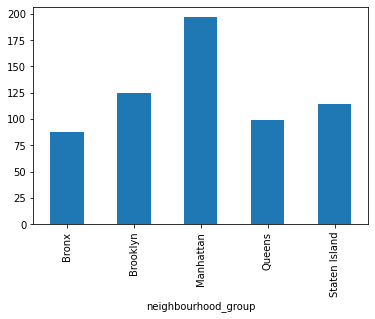

In [22]:
boro_group['price'].mean().plot.bar()

To save your plot in an image file you can do the following to leave more space at the bottom of the figure to fully visualize the names of the boroughs on the x axis, label the y axis, and then clear the figure so we can make more plots later:

In [23]:
#create more space for x-axis labels
plt.gcf().subplots_adjust(bottom=0.25)
plt.ylabel('Average Price')
#get the current figure
fig = plt.gcf()
#save figure to an image file
fig.savefig('meanPrice.png')

#clear figure to generate next pyplot
plt.clf()

<Figure size 432x288 with 0 Axes>

We can observe that, as we all probably expected, Manhattan has the higest prices.  

Let's now plot the data to observe the average number of reviews by borough:

<AxesSubplot:xlabel='neighbourhood_group'>

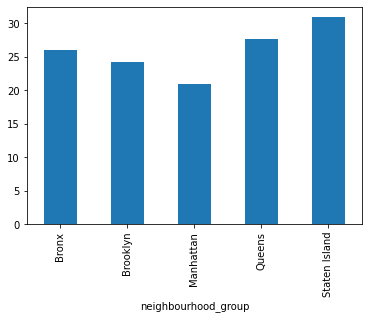

In [24]:
#Generate mean reviews barplot
boro_group['number_of_reviews'].mean().plot.bar()

Let's save this plot to a file (we already adjusted the bottom of the fiugre, so we don't need to repeat that):

In [25]:
#label the y-axis
plt.ylabel('Average Number of Reviews')
#get the current figure
fig2 = plt.gcf()
#save figure to an image file
fig2.savefig('meanReviews.png')

#clear figure to generate next pyplot
plt.clf()

<Figure size 432x288 with 0 Axes>

Staten Island has the most reviews on average!!!  

Let's look at the "minimum number of nights" requirement by neighborhood:

<AxesSubplot:xlabel='neighbourhood_group'>

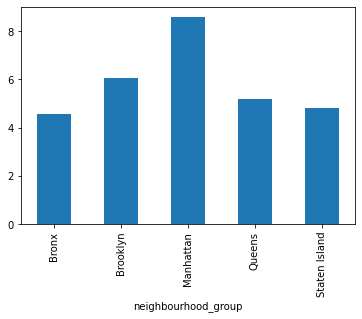

In [26]:
boro_group['minimum_nights'].mean().plot.bar()

Let's save this plot to a file:

In [27]:
#label the y-axis
plt.ylabel('Average Minimum Number of Nights')
#get the current figure
fig2 = plt.gcf()
#save figure to an image file
fig2.savefig('meanMinNights.png')

#clear figure to generate next pyplot
plt.clf()

<Figure size 432x288 with 0 Axes>

We can observe that, on average, Manhattan requires the highest number of minimum nights per stay. All neighborhoods require, on average, more than 4-night stays.  

Now you may wonder, what is the maximum number of minimum_nights in each borough?

<AxesSubplot:xlabel='neighbourhood_group'>

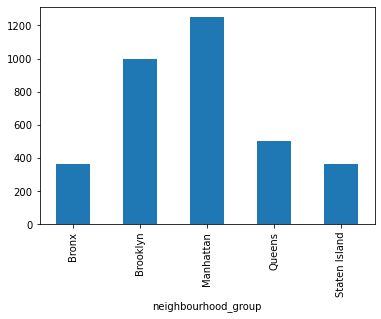

In [28]:
boro_group['minimum_nights'].max().plot.bar()

In [29]:
#label the y-axis
plt.ylabel('Max Minimum Number of Nights')
#get the current figure
fig2 = plt.gcf()
#save figure to an image file
fig2.savefig('maxMinNights.png')
#clear figure to generate next pyplot
plt.clf()

<Figure size 432x288 with 0 Axes>

Now we can see that there are long-term listings in all neighborhoods, Manhattan with the highest min stays (more than 3 years!!!)

Let's say I now want to look at data from Staten Island only (**note I am selecting rows here!!!**)

In [30]:
#Select only listings in Staten Island
st = airbnb[airbnb['neighbourhood_group'] == 'Staten Island']
print("Number of listings in Staten Island: ", len(st))

Number of listings in Staten Island:  373


I now have a new dataframe called st with only rows where neighbourhood_group == 'Staten Island", and I can see that there are 373 listings for Staten Island.

### YOUR TURN!

Now that you know how to explore the data, clean the data, obtain statistics about your data and select a subset of the data based on the value in a particular column (e.g. neighbourhood_group == 'Staten Island"), think about how you want to explore the data for your analysis:   
  1. Individually, analyze the data in your neighborhood and compare to the data for the borough.  
  2. As a group, think about an overall data-driven discussion to compare your borough to the others.  
  
As you explore your data, keep in mind your observations and conclusions from HC2 and HC3 and see if you can make any connections, or if you find that the data supports those conclusions.